<h2>Importing librarys and data</h2>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os


In [ ]:
#df = pd.read_csv("train_data.csv")

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving train_data.csv to train_data (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['train_data.csv']))

# New Section

In [ ]:
#Looking some information of the data
print(df.shape)
print(df.nunique())


(7160, 14)
Customer Id           7160
YearOfObservation        5
Insured_Period         401
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    2043
Building_Type            4
Date_of_Occupancy      134
NumberOfWindows         11
Geo_Code              1307
Claim                    2
dtype: int64


In [ ]:
df = df.rename(columns={'Building Dimension' : 'Building_Dimension'})

In [ ]:
df['Residential'].unique()
df['Building_Painted'].unique()  # dummie
df['Building_Fenced'].unique() #dummie
df['Garden'].unique() #dummie
df['Settlement'].unique() #dummie
df['NumberOfWindows'].unique() #ordinal 
df['Building_Type'].unique() # nominal use one hot encoding

array([1, 2, 4, 3])

In [ ]:
df.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [ ]:
#Looking for Nulls and type of our data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building_Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

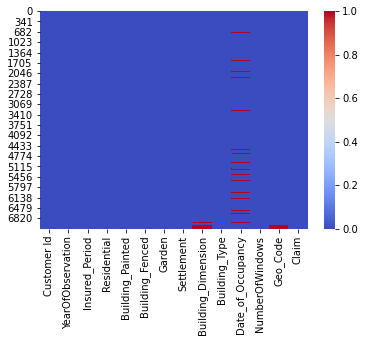

In [ ]:
sns.heatmap(df.isnull(),cmap='coolwarm')

In [ ]:
df.dropna(inplace=True)

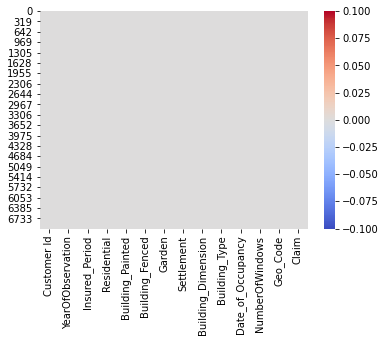

In [ ]:
sns.heatmap(df.isnull(),cmap='coolwarm')

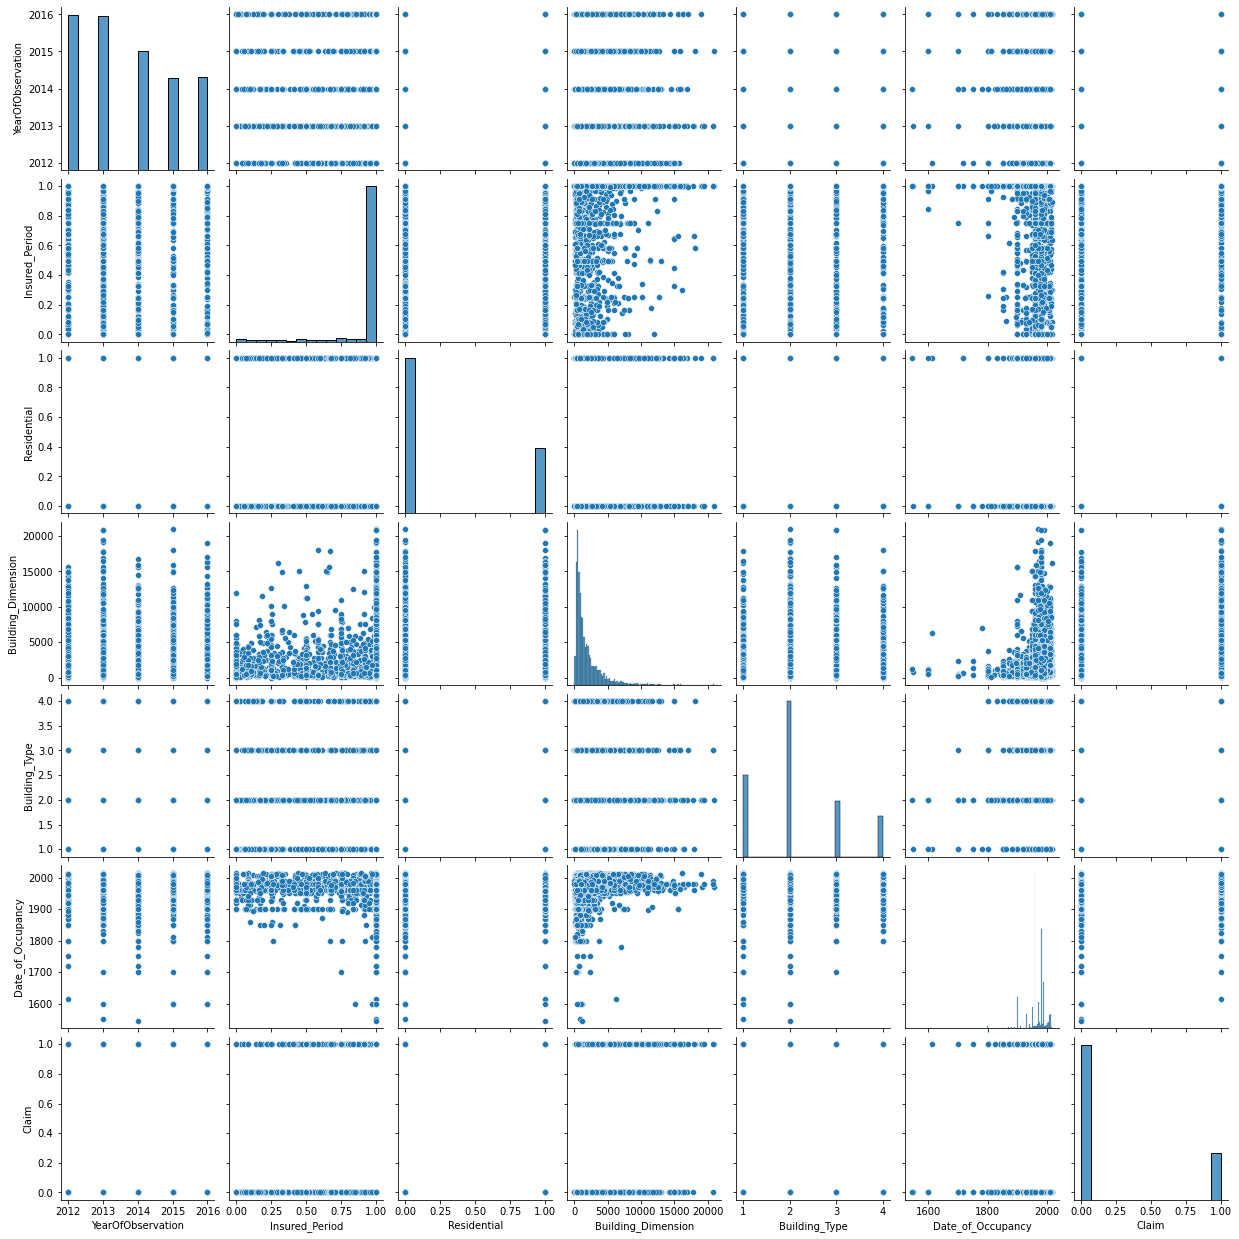

In [ ]:
sns.pairplot(df)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algAorithm won't be able to directly take in those features as inputs.

In [ ]:
df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [ ]:
Residential = pd.get_dummies(df['Residential'],drop_first=True)
Building_Painted = pd.get_dummies(df['Building_Painted'],drop_first=True)
Building_Fenced = pd.get_dummies(df['Building_Fenced'],drop_first=True)
Garden = pd.get_dummies(df['Garden'],drop_first=True)
Settlement = pd.get_dummies(df['Settlement'],drop_first=True)
Building_Type = pd.get_dummies(df['Building_Type'],drop_first=True)
Claim =  pd.get_dummies(df['Claim'],drop_first=True)

In [ ]:
df.drop(['Residential','Building_Painted','Building_Fenced','Garden','Settlement','Claim' ],axis=1,inplace=True)

In [ ]:
df['NumberOfWindows'].unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [ ]:


df.loc[(df["NumberOfWindows"] == '   .'),"NumberOfWindows"] = 0
df.loc[(df["NumberOfWindows"] == '>=10'),"NumberOfWindows"] = 10



In [ ]:
df['NumberOfWindows']= pd.to_numeric(df['NumberOfWindows'])

In [ ]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H14663,2013,1.0,290.0,1,1960.0,0,1053
1,H2037,2015,1.0,490.0,1,1850.0,4,1053
2,H3802,2014,1.0,595.0,1,1960.0,0,1053
3,H3834,2013,1.0,2840.0,1,1960.0,0,1053
4,H5053,2014,1.0,680.0,1,1800.0,3,1053


In [ ]:
df.head(10)

,Customer Id,YearOfObservation,Insured_Period,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H14663,2013,1.0,290.0,1,1960.0,0,1053
1,H2037,2015,1.0,490.0,1,1850.0,4,1053
2,H3802,2014,1.0,595.0,1,1960.0,0,1053
3,H3834,2013,1.0,2840.0,1,1960.0,0,1053
4,H5053,2014,1.0,680.0,1,1800.0,3,1053
5,H4977,2012,1.0,535.0,1,1980.0,3,1143
6,H7390,2012,1.0,2830.0,1,1988.0,0,1143
7,H14488,2015,1.0,4952.0,1,1988.0,0,1160
8,H19355,2014,1.0,2735.0,1,2013.0,3,1173
9,H18601,2015,1.0,520.0,1,2011.0,2,1224


In [ ]:
df['Building_Painted'] = Building_Painted
df['Residential']  = Residential
df['Garden']  = Garden
df['Settlement'] = Settlement
df['Building_Fenced'] = Building_Fenced
df['Claim'] = Claim

In [ ]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Building_Painted,Residential,Garden,Settlement,Building_Fenced,Claim
0,H14663,2013,1.0,290.0,1,1960.0,0,1053,0,0,1,1,1,0
1,H2037,2015,1.0,490.0,1,1850.0,4,1053,1,0,0,0,0,0
2,H3802,2014,1.0,595.0,1,1960.0,0,1053,0,0,1,1,1,0
3,H3834,2013,1.0,2840.0,1,1960.0,0,1053,1,0,1,1,1,0
4,H5053,2014,1.0,680.0,1,1800.0,3,1053,1,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 7057
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         6543 non-null   object 
 1   YearOfObservation   6543 non-null   int64  
 2   Insured_Period      6543 non-null   float64
 3   Building_Dimension  6543 non-null   float64
 4   Building_Type       6543 non-null   int64  
 5   Date_of_Occupancy   6543 non-null   float64
 6   NumberOfWindows     6543 non-null   int64  
 7   Geo_Code            6543 non-null   object 
 8   Building_Painted    6543 non-null   uint8  
 9   Residential         6543 non-null   uint8  
 10  Garden              6543 non-null   uint8  
 11  Settlement          6543 non-null   uint8  
 12  Building_Fenced     6543 non-null   uint8  
 13  Claim               6543 non-null   uint8  
dtypes: float64(3), int64(3), object(2), uint8(6)
memory usage: 498.4+ KB


In [ ]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Building_Painted,Residential,Garden,Settlement,Building_Fenced,Claim
0,H14663,2013,1.0,290.0,1,1960.0,0,1053,0,0,1,1,1,0
1,H2037,2015,1.0,490.0,1,1850.0,4,1053,1,0,0,0,0,0
2,H3802,2014,1.0,595.0,1,1960.0,0,1053,0,0,1,1,1,0
3,H3834,2013,1.0,2840.0,1,1960.0,0,1053,1,0,1,1,1,0
4,H5053,2014,1.0,680.0,1,1800.0,3,1053,1,0,0,0,0,0


In [ ]:
df.nunique()
df.info

<bound method DataFrame.info of      Customer Id  YearOfObservation  ...  Building_Fenced  Claim
0         H14663               2013  ...                1      0
1          H2037               2015  ...                0      0
2          H3802               2014  ...                1      0
3          H3834               2013  ...                1      0
4          H5053               2014  ...                0      0
...          ...                ...  ...              ...    ...
7053      H19773               2015  ...                0      0
7054      H13396               2013  ...                1      0
7055      H13397               2015  ...                1      0
7056      H14758               2013  ...                1      0
7057      H13900               2013  ...                1      0

[6543 rows x 14 columns]>

In [ ]:
df['Geo_Code'].head()

0    1053
1    1053
2    1053
3    1053
4    1053
Name: Geo_Code, dtype: object

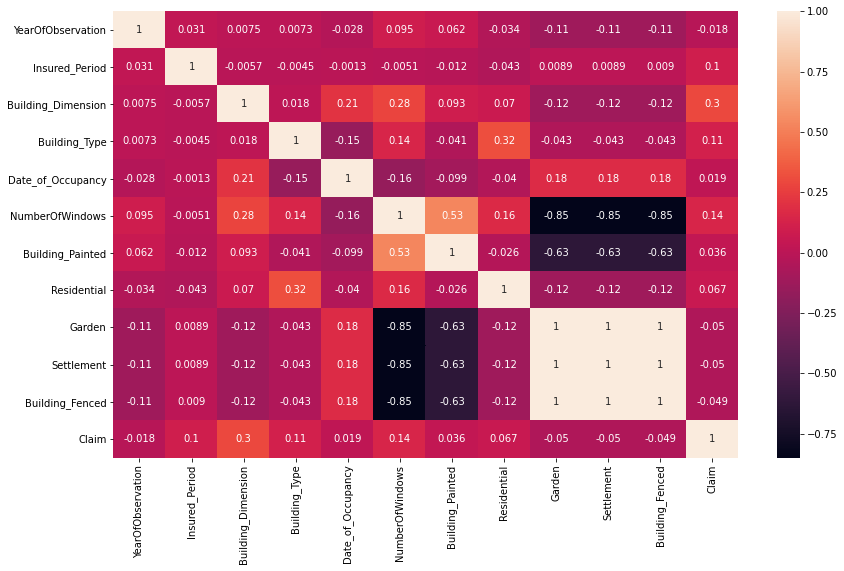

In [ ]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
v=df.corr()
sns.heatmap(v, annot=True,)

In [ ]:
df.drop(['Geo_Code', 'Customer Id'],axis=1,inplace=True)  # dropping irrevelant columns

In [ ]:
df.head()

,YearOfObservation,Insured_Period,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Building_Painted,Residential,Garden,Settlement,Building_Fenced,Claim
0,2013,1.0,290.0,1,1960.0,0,0,0,1,1,1,0
1,2015,1.0,490.0,1,1850.0,4,1,0,0,0,0,0
2,2014,1.0,595.0,1,1960.0,0,0,0,1,1,1,0
3,2013,1.0,2840.0,1,1960.0,0,1,0,1,1,1,0
4,2014,1.0,680.0,1,1800.0,3,1,0,0,0,0,0


In [ ]:
df['NumberOfWindows'].unique()

array([ 0,  4,  3,  2,  5, 10,  6,  7,  9,  8,  1])

In [ ]:
y=df['Claim']
X=df.drop(["Claim"], axis=1) #labels

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1650
           1       0.74      0.12      0.21       510

    accuracy                           0.78      2160
   macro avg       0.76      0.56      0.54      2160
weighted avg       0.77      0.78      0.72      2160



In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 52.78101851851852
MSE: 0.21712962962962962
RMSE: 0.4659717047521551


## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1650
           1       0.36      0.36      0.36       510

    accuracy                           0.70      2160
   macro avg       0.58      0.58      0.58      2160
weighted avg       0.70      0.70      0.70      2160



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1326  324]
 [ 328  182]]


## Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1650
           1       0.53      0.28      0.36       510

    accuracy                           0.77      2160
   macro avg       0.67      0.60      0.61      2160
weighted avg       0.74      0.77      0.74      2160



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1523  127]
 [ 369  141]]


## Tensor Flow

In [ ]:
import tensorflow as tf

In [ ]:
df.head()

,YearOfObservation,Insured_Period,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Building_Painted,Residential,Garden,Settlement,Building_Fenced,Claim
0,2013,1.0,290.0,1,1960.0,0,0,0,1,1,1,0
1,2015,1.0,490.0,1,1850.0,4,1,0,0,0,0,0
2,2014,1.0,595.0,1,1960.0,0,0,0,1,1,1,0
3,2013,1.0,2840.0,1,1960.0,0,1,0,1,1,1,0
4,2014,1.0,680.0,1,1800.0,3,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('Claim',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.fit_transform(df.drop('Claim',axis=1))

In [ ]:
df.columns

Index(['YearOfObservation', 'Insured_Period', 'Building_Dimension',
       'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows',
       'Building_Painted', 'Residential', 'Garden', 'Settlement',
       'Building_Fenced', 'Claim'],
      dtype='object')

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,YearOfObservation,Insured_Period,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Building_Painted,Residential,Garden,Settlement,Building_Fenced
0,-0.500330,0.357329,-0.711158,-1.251455,-0.124688,-0.939075,-1.740385,-0.64635,1.106686,1.106686,1.106344
1,0.940541,0.357329,-0.624523,-1.251455,-3.204269,0.635596,0.574585,-0.64635,-0.903599,-0.903599,-0.903878
2,0.220106,0.357329,-0.579040,-1.251455,-0.124688,-0.939075,-1.740385,-0.64635,1.106686,1.106686,1.106344
3,-0.500330,0.357329,0.393435,-1.251455,-0.124688,-0.939075,0.574585,-0.64635,1.106686,1.106686,1.106344
4,0.220106,0.357329,-0.542220,-1.251455,-4.604078,0.241929,0.574585,-0.64635,-0.903599,-0.903599,-0.903878


In [ ]:
df_feat.columns

Index(['YearOfObservation', 'Insured_Period', 'Building_Dimension',
       'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows',
       'Building_Painted', 'Residential', 'Garden', 'Settlement',
       'Building_Fenced'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 7057
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   6543 non-null   int64  
 1   Insured_Period      6543 non-null   float64
 2   Building_Dimension  6543 non-null   float64
 3   Building_Type       6543 non-null   int64  
 4   Date_of_Occupancy   6543 non-null   float64
 5   NumberOfWindows     6543 non-null   int64  
 6   Building_Painted    6543 non-null   uint8  
 7   Residential         6543 non-null   uint8  
 8   Garden              6543 non-null   uint8  
 9   Settlement          6543 non-null   uint8  
 10  Building_Fenced     6543 non-null   uint8  
 11  Claim               6543 non-null   uint8  
dtypes: float64(3), int64(3), uint8(6)
memory usage: 396.2 KB


In [ ]:
yearOfObservation = tf.feature_column.numeric_column("YearOfObservation")
insured_Period= tf.feature_column.numeric_column('Insured_Period')
building_Dimension = tf.feature_column.numeric_column('Building_Dimension')
building_Type =tf.feature_column.numeric_column('Building_Type')
date_of_Occupancy = tf.feature_column.numeric_column("Date_of_Occupancy")
numberOfWindows = tf.feature_column.numeric_column('NumberOfWindows')
building_Painted = tf.feature_column.numeric_column('Building_Painted')
residential  =tf.feature_column.numeric_column('Residential')
garden  = tf.feature_column.numeric_column("Garden")
settlement = tf.feature_column.numeric_column('Settlement')
building_Fenced = tf.feature_column.numeric_column('Building_Fenced')


In [ ]:
df_feat.columns

Index(['YearOfObservation', 'Insured_Period', 'Building_Dimension',
       'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows',
       'Building_Painted', 'Residential', 'Garden', 'Settlement',
       'Building_Fenced'],
      dtype='object')

In [ ]:
feat_cols = [yearOfObservation, insured_Period, building_Dimension,
       building_Type, date_of_Occupancy, numberOfWindows,
       building_Painted, residential, garden, settlement,building_Fenced]

In [ ]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpy_dsat46', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
#X_trainn = X_train.rename(columns={'Building Dimension' : 'Building_Dimension'})

In [ ]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,shuffle=True)

In [ ]:
classifier.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 

## Model Evaluation


In [ ]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [ ]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpy_dsat46/model.ckpt-220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
note_predictions[0]

{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object),
 'logistic': array([0.00201756], dtype=float32),
 'logits': array([-6.2038417], dtype=float32),
 'probabilities': array([0.9979824 , 0.00201757], dtype=float32)}

In [ ]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,final_preds))

[[1378  272]
 [ 363  147]]


In [ ]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1650
           1       0.35      0.29      0.32       510

    accuracy                           0.71      2160
   macro avg       0.57      0.56      0.56      2160
weighted avg       0.69      0.71      0.70      2160



## Optional Comparison


**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_preds = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1650
           1       0.51      0.28      0.36       510

    accuracy                           0.77      2160
   macro avg       0.66      0.60      0.61      2160
weighted avg       0.73      0.77      0.74      2160



In [ ]:
print(confusion_matrix(y_test,rfc_preds))

[[1513  137]
 [ 368  142]]
